<a href="https://colab.research.google.com/github/nelsimelgarejo/aprendizajeautomatico/blob/master/Desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargando los archivos

In [ ]:
train_set = pd.read_csv('ticdata2000.csv',sep=',')

In [ ]:
test_set = pd.read_csv('ticeval2000.csv',sep=',')

In [ ]:
sample_set = pd.read_csv('tictgts2000.csv',sep=',')

In [ ]:
#Vemos la cantidad de registros nulos
train_set.isna().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [ ]:
#Vemos los nombres de las columnas
train_set.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [ ]:
#Vemos las 5 primeras filas
train_set.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**Analizando datos**

In [ ]:
#Vemos la cantidad de valores únicos de las columnas
train_set.nunique()

MOSTYPE     40
MAANTHUI     9
MGEMOMV      5
MGEMLEEF     6
MOSHOOFD    10
            ..
APLEZIER     3
AFIETS       4
AINBOED      3
ABYSTAND     3
CARAVAN      2
Length: 86, dtype: int64

In [ ]:
#Visualizamos la cantidad de datos que hay en la columna Caravan
train_set["CARAVAN"].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

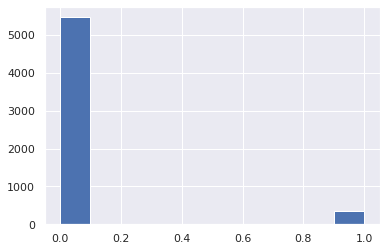

In [ ]:
#Visualizamos el histograma la columna Caravan
train_set["CARAVAN"].hist()

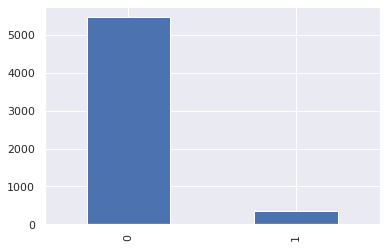

In [ ]:
#Vemos en gráfico de barras 
fig = plt.figure()
train_set["CARAVAN"].value_counts().plot(kind='bar')

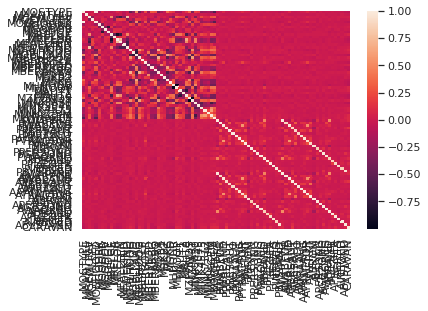

In [ ]:
#Vemos la correlación entre las columnas
import seaborn as sns
corr = train_set.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

           MOSTYPE     MAANTHUI  ...     ABYSTAND      CARAVAN
count  5822.000000  5822.000000  ...  5822.000000  5822.000000
mean     24.253349     1.110615  ...     0.014256     0.059773
std      12.846706     0.405842  ...     0.119996     0.237087
min       1.000000     1.000000  ...     0.000000     0.000000
25%      10.000000     1.000000  ...     0.000000     0.000000
50%      30.000000     1.000000  ...     0.000000     0.000000
75%      35.000000     1.000000  ...     0.000000     0.000000
max      41.000000    10.000000  ...     2.000000     1.000000

[8 rows x 86 columns]


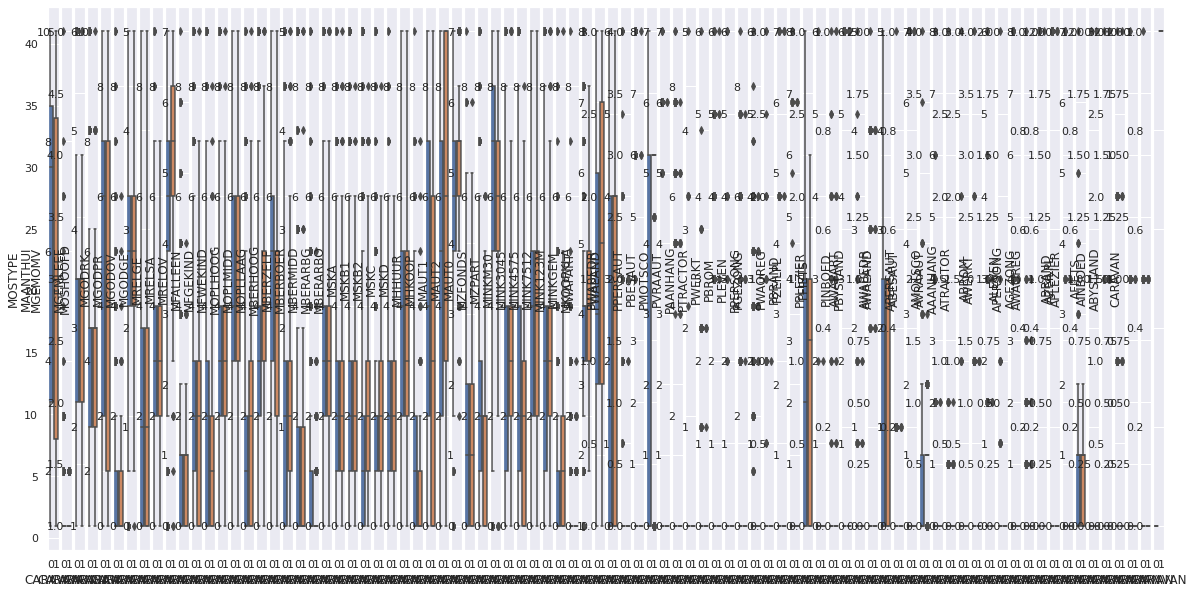

In [ ]:
fig,axes = plt.subplots(1,86,figsize=(20,10))
for idx,cat_col in enumerate(train_set.columns):
    sns.boxplot(y=cat_col,data=train_set,x="CARAVAN",ax=axes[idx])

print(train_set[train_set.columns].describe())
plt.subplots_adjust(hspace=1)